<a href="https://colab.research.google.com/github/yuzebin/colab/blob/main/NFT_Art_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title pixray_install
#@markdown Run this once, then press "Runtime" and "Restart and Run all"
%%capture
pixray_version = "latest release" #@param ["latest release", "next planned release"]
branch = "release"
if pixray_version == "next planned release":
  branch = "master"
!rm -Rf pixray
!git clone --recursive --branch $branch https://github.com/pixray/pixray
!pip install -r pixray/requirements.txt
!pip install basicsr
!pip uninstall -y tensorflow 
!git clone https://github.com/pixray/diffvg
%cd diffvg
!git submodule update --init --recursive
!python setup.py install
%cd ..
!pip freeze | grep torch

import sys
sys.path.append("pixray")
import pixray

  2%|▋                                     | 5.62M/335M [00:00<00:05, 58.9MiB/s]

Using seed: 14847904784681251643
Running pixeldrawer with 80x45 grid


100%|███████████████████████████████████████| 335M/335M [00:05<00:00, 62.9MiB/s]


Loaded CLIP ViT-B/16: 224x224 and 149.62M params
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['desert monolith #pixelart']


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


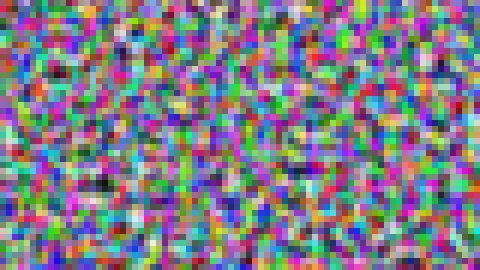

iter: 0, loss: 0.981, losses: 0.916, 0.0652 (-0=>0.9809)
iter: 10, loss: 0.868, losses: 0.807, 0.0606 (-0=>0.8681)


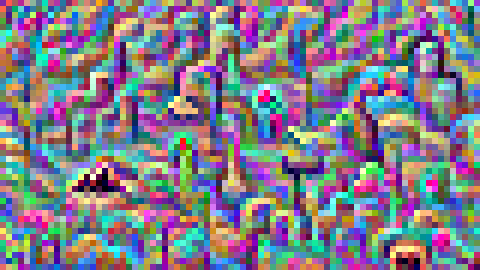

iter: 20, loss: 0.805, losses: 0.744, 0.0615 (-0=>0.8051)
iter: 30, loss: 0.769, losses: 0.704, 0.0655 (-0=>0.7691)


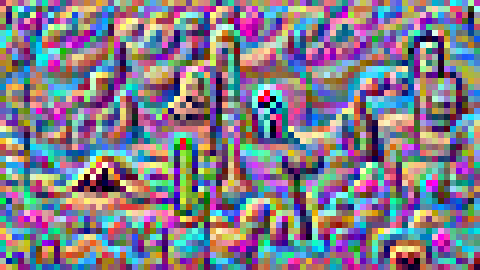

iter: 40, loss: 0.739, losses: 0.673, 0.0663 (-0=>0.7392)
iter: 50, loss: 0.724, losses: 0.655, 0.0683 (-0=>0.7235)


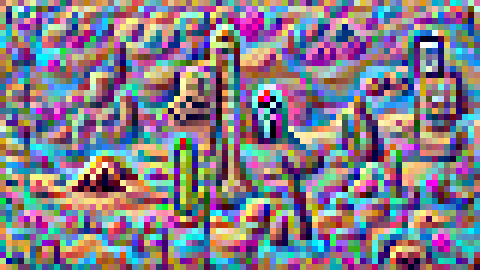

iter: 60, loss: 0.703, losses: 0.635, 0.0681 (-0=>0.7032)
iter: 70, loss: 0.714, losses: 0.646, 0.0679 (-1=>0.6945)


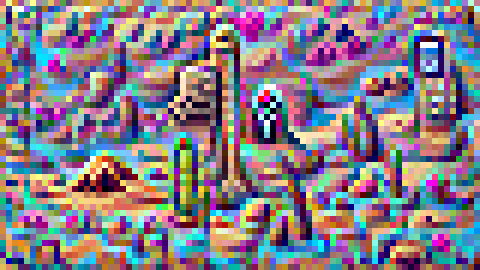

iter: 80, loss: 0.692, losses: 0.623, 0.0691 (-1=>0.6894)
iter: 90, loss: 0.685, losses: 0.616, 0.0697 (-4=>0.6831)


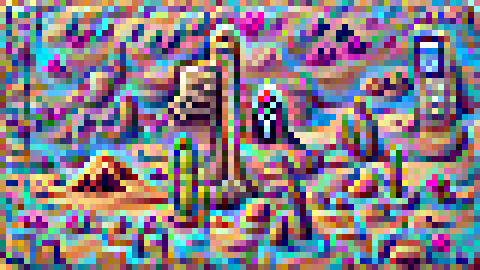

iter: 100, loss: 0.667, losses: 0.596, 0.0712 (-0=>0.6672)
iter: 110, loss: 0.676, losses: 0.605, 0.0714 (-1=>0.6655)


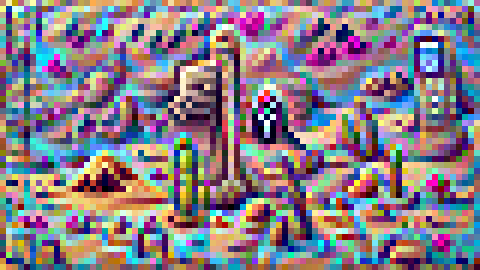

iter: 120, loss: 0.669, losses: 0.598, 0.0713 (-4=>0.6632)
iter: 130, loss: 0.657, losses: 0.584, 0.0726 (-0=>0.6568)


In [ ]:
#@title Generate pixel art{ vertical-output: true }
#pixel
pixray.run(
    "desert monolith #pixelart",
    "pixel",
    quality="draft",
    scale=2.5,
)

In [ ]:
#@title Generate { vertical-output: true }
#default (vqgan)

input_list = ["Okapi", "Fossa", "The Maned Wolf", "The Blue Dragon", "Slow Loris",
              "Angora Rabbit", "Pacu Fish", "Axolotl", "Blobfish"]

for animal in input_list:
  print(animal)
  pixray.run(
      animal,
      drawer = "vqgan",
      quality = "draft",
      custom_loss = "aesthetic",
      display_clear= True
  )